In [140]:
import tensorflow as tf

In [141]:
x = 1
y = x+9
print(y)

10


In [142]:
x = tf.constant(1, name = 'x')
y = tf.Variable(x+9, name = 'y')
print(y)

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [143]:
x = tf.constant(1, name = 'x')
y = tf.Variable(x+9, name = 'y')

#this is not actually running the initializer just assigns it
model = tf.global_variables_initializer()

with tf.Session() as session:
    #at this point the initialization happens. Create a session
    session.run(model)
    print(session.run(y))


10


# Place holder and Sessions

In [144]:
# Placeholder tells the system type of variable which will be passes later
a = tf.placeholder('int32')
b = tf.placeholder('int32')

y = tf.multiply(a,b)

sess = tf.Session()

sess.run(y, feed_dict={a:2, b:5})

10

In [145]:
# Same as above for aaddition
a = tf.placeholder('int32')
b = tf.placeholder('int32')

y = tf.add(a,b)

sess = tf.Session()

sess.run(y, feed_dict={a:2, b:5})

7

# Tensor Data Structure

It can be identified by RANK, SHAPE, TYPE
Rank: the number of dimentions of tensor
    n-dimensional array or list
    ex: Rank 0(scalar), Rank 1(a 1 by n vector), Rank2(n by m matrix), Rank 3(n by m by q matrix)
Shape: similar to df.shape
type: int, float etc

In [146]:
import numpy as np

In [147]:
tensor_1d = np.array([1.3,1,4.0,23.99])
print(tensor_1d)

[  1.3    1.     4.    23.99]


In [148]:
print(tensor_1d[0])
print(tensor_1d[2])

1.3
4.0


In [149]:
tensor_1d.ndim # this is like the rank

1

In [150]:
tensor_1d.shape

(4,)

In [151]:
#convert the array to TF tensor
tf_tensor = tf.convert_to_tensor(tensor_1d, dtype=tf.float64)
print(tf_tensor)

Tensor("Const_4:0", shape=(4,), dtype=float64)


In [152]:
with tf.Session() as sess:
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[2]))

[  1.3    1.     4.    23.99]
1.3
4.0


In [153]:
# Lets build 2 integer arrays
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)], dtype = 'int32')
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)], dtype = 'int32')

print('matrix1 = ')
print(matrix1)

print('matrix2 = ')
print(matrix2)

matrix1 = 
[[2 2 2]
 [2 2 2]
 [2 2 2]]
matrix2 = 
[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [154]:
matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)

In [155]:


matrix_product = tf.matmul(matrix1,matrix2)

matrix3 = np.array([(1,1,1),(1,1,1),(1,1,1)], dtype = 'float32')

matrix_det = tf.matrix_determinant(matrix3)
matrix_det

#print(matrix_product)

<tf.Tensor 'MatrixDeterminant:0' shape=() dtype=float32>

In [156]:
with tf.Session() as sess:
    print(sess.run(matrix_product))
    print(sess.run(matrix_det))

[[6 6 6]
 [6 6 6]
 [6 6 6]]
0.0


# Tensor Board

Visualization

# Packages

In [157]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [158]:
type(mnist.train.images)

numpy.ndarray

In [159]:
mnist.train.images.shape

(55000, 784)

In [160]:
sample = mnist.train.images[2000].reshape(28,28)

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline

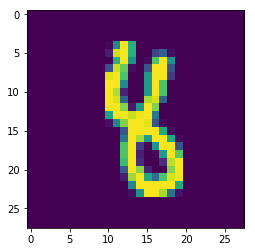

In [162]:
plt.imshow(sample)

# Parameters

In [163]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# Network Parameters

In [164]:
# Parameter
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10
n_samples = mnist.train.num_examples

# Wheight and Bias

In [165]:
def multilayer_perception(x,weights,biases):
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.add(tf.matmul(layer_2,weights['out']), biases['out'])
    return(out_layer)

In [166]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}

biases = {    
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])),
}

In [167]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_classes])

In [168]:
pred = multilayer_perception(x,weights,biases)

In [169]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training the model

In [170]:
init = tf.global_variables_initializer()

In [171]:
Xsamp, ysamp = mnist.train.next_batch(1)

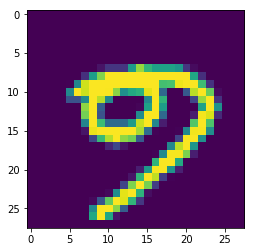

In [172]:
plt.imshow(Xsamp.reshape(28,28))

In [173]:
print(ysamp)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [174]:
sess = tf.InteractiveSession()
sess.run(init)

/Users/HS/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [175]:
for epoch in range(training_epochs):
    avg_cost =0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _, c = sess.run([optimizer,cost], feed_dict={x: batch_x, y: batch_y})
        
        avg_cost += c/total_batch
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=195.6080
Epoch: 2 cost=42.5596
Epoch: 3 cost=26.7062
Epoch: 4 cost=18.8026
Epoch: 5 cost=13.6584
Epoch: 6 cost=10.0799
Epoch: 7 cost=7.4554
Epoch: 8 cost=5.6534
Epoch: 9 cost=4.3118
Epoch: 10 cost=3.1679
Epoch: 11 cost=2.5141
Epoch: 12 cost=1.8008
Epoch: 13 cost=1.3983
Epoch: 14 cost=1.1060
Epoch: 15 cost=0.9467
Model has completed 15 Epochs of Training


# Model Evaluation

In [176]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [177]:
print(correct_predictions[0])

Tensor("strided_slice_13:0", shape=(), dtype=bool)


In [178]:
correct_predictions = tf.cast(correct_predictions,'float')
print(correct_predictions[0])

Tensor("strided_slice_14:0", shape=(), dtype=float32)


In [179]:
accuracy = tf.reduce_mean(correct_predictions)

In [180]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [181]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [182]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [183]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9472
